In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import math
import seaborn as sns

In [2]:
df = pd.read_csv('df3.csv').drop(columns = 'Unnamed: 0')
df

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,card_desc_count_0_by_30,card_desc_count_1_by_7,card_desc_count_1_by_14,card_desc_count_1_by_30,merch_desc_count_0_by_7,merch_desc_count_0_by_14,merch_desc_count_0_by_30,merch_desc_count_1_by_7,merch_desc_count_1_by_14,merch_desc_count_1_by_30
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,0.640298,0.367905,0.476214,0.606517,0.963189,1.136581,1.337872,0.871136,1.061472,1.262391
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0,...,0.640298,0.367905,0.476214,0.606517,0.963189,1.136581,1.337872,0.871136,1.061472,1.262391
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,...,0.640298,0.367905,0.476214,0.606517,0.963189,1.136581,1.337872,0.871136,1.061472,1.262391
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0,...,0.640298,0.367905,0.476214,0.606517,0.963189,1.136581,1.337872,0.871136,1.061472,1.262391
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,0.640298,0.367905,0.476214,0.606517,0.963189,1.136581,1.337872,0.871136,1.061472,1.262391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042,P,84.79,0,...,0.640298,0.367905,0.476214,0.606517,0.963189,1.136581,1.337872,0.871136,1.061472,1.262391
96393,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248,P,118.75,0,...,-1.071577,0.367905,-1.693394,-1.177600,0.963189,-0.915423,-0.828069,0.871136,-1.102227,-0.939715
96394,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150,P,363.56,0,...,0.640298,0.367905,0.476214,0.606517,0.061288,0.037293,-0.683673,-0.138143,-0.097652,-0.792908
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656,P,2202.03,0,...,-1.642201,0.367905,0.476214,-1.772306,-1.291563,-1.231116,-1.134125,-0.138143,-0.810960,-1.083331


In [3]:
columns = pd.read_csv('vars_30.csv').drop(columns = 'Unnamed: 0')
columns

,Variable
0,card_desc_total_3
1,card_state_max_30
2,card_state_total_7
3,card_zip_max_1
4,merch_desc_total_0
5,card_desc_total_30
6,card_desc_total_14
7,Cardnum_total_0
8,merch_state_total_1
9,card_merch_max_1


In [4]:
columns.loc[30, 'Variable'] = 'Fraud'

In [5]:
df.Date=pd.to_datetime(df.Date)

model_data = df[(df['Date'] < pd.to_datetime('2010-09-01'))]
oot_data = df[(df['Date'] > pd.to_datetime('2010-09-01'))]

In [136]:
model_data_selected = model_data.loc[: ,list(columns['Variable'])]
oot_data_selectded = oot_data[list(columns['Variable'])]

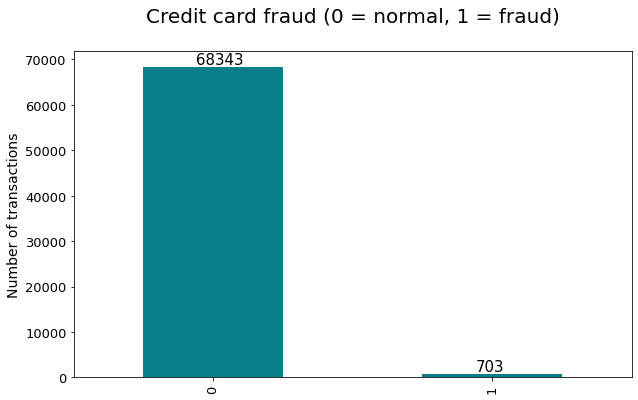

In [11]:
ax = model_data['Fraud'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Credit card fraud (0 = normal, 1 = fraud)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

In [12]:
X= model_data_selected.drop('Fraud', axis=1)
y= model_data_selected['Fraud'] 

In [14]:
def FDR(model,i):
    prop=0.03
    len_train=round(len(x_train)*prop)
    len_test=round(len(x_test)*prop)
    len_oot=round(len(oot_data_selected)*prop)
    
    pred_train=model.predict_proba(x_train)[:,1]
    lg_train=pd.DataFrame({'Pred': pred_train, 'Fraud':y_train}).sort_values(by='Pred',ascending=False).head(len_train)
    
    pred_test=model.predict_proba(x_test)[:,1]
    lg_test=pd.DataFrame({'Pred': pred_test, 'Fraud':y_test}).sort_values(by='Pred',ascending=False).head(len_test)
    
    pred_oot=model.predict_proba(oot_data_selected.drop('Fraud',axis=1))[:,1]
    lg_oot=pd.DataFrame({'Pred': pred_oot, 'Fraud':oot_data_selected.Fraud}).sort_values(by='Pred',ascending=False).head(len_oot)
    
    FDR_train=sum(lg_train.Fraud)/sum(y_train)
    FDR_test=sum(lg_test.Fraud)/sum(y_test)
    FDR_oot=sum(lg_oot.Fraud)/sum(oot_data_selected.Fraud)
    
    df_FDR=pd.DataFrame({'Train': FDR_train, 'Test':FDR_test,'OOT':FDR_oot},index=[i])
    
    return (df_FDR)

# Logistic Regression

In [15]:
import numpy as np
df_logistic=pd.DataFrame(np.zeros(shape=(10,6)),columns=["C","penalty","solver","Train","Test","OOT"])

In [16]:
df_logistic['C']="1"
df_logistic['penalty']="l1"
df_logistic['solver']="liblinear"

model = LogisticRegression(C=1,
                           penalty = 'l1',
                           solver="liblinear",
                           class_weight='balanced',
                           max_iter=5000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']= FDR(model,i)

df_logistic

,C,penalty,solver,Train,Test,OOT
0,1,l1,liblinear,0.718884,0.641350,0.584270
1,1,l1,liblinear,0.708696,0.658436,0.544944
2,1,l1,liblinear,0.695556,0.667984,0.542135
3,1,l1,liblinear,0.709016,0.632558,0.525281
4,1,l1,liblinear,0.690987,0.708861,0.544944
5,1,l1,liblinear,0.692946,0.696833,0.573034
6,1,l1,liblinear,0.692149,0.666667,0.525281
7,1,l1,liblinear,0.681159,0.695455,0.544944
8,1,l1,liblinear,0.706366,0.652778,0.519663
9,1,l1,liblinear,0.694093,0.703057,0.542135


In [17]:
df_logistic[['Train','Test','OOT']].mean()

Train    0.698985
Test     0.672398
OOT      0.544663
dtype: float64

In [20]:
df_logistic['C']="10"
df_logistic['penalty']="l1"
df_logistic['solver']="liblinear"

model = LogisticRegression(C=10,
                           penalty = 'l1',
                           solver="liblinear",
                           class_weight='balanced',
                           max_iter=5000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)

df_logistic

,C,penalty,solver,Train,Test,OOT
0,10,l1,liblinear,0.711253,0.650862,0.488764
1,10,l1,liblinear,0.678647,0.734783,0.561798
2,10,l1,liblinear,0.726115,0.612069,0.542135
3,10,l1,liblinear,0.698031,0.699187,0.578652
4,10,l1,liblinear,0.691796,0.698413,0.525281
5,10,l1,liblinear,0.689076,0.709251,0.550562
6,10,l1,liblinear,0.715640,0.676157,0.528090
7,10,l1,liblinear,0.699580,0.709251,0.528090
8,10,l1,liblinear,0.692308,0.729730,0.561798
9,10,l1,liblinear,0.685106,0.690987,0.547753


In [21]:
df_logistic[['Train','Test','OOT']].mean()

Train    0.698755
Test     0.691069
OOT      0.541292
dtype: float64

In [22]:
df_logistic['C']="100"
df_logistic['penalty']="l1"
df_logistic['solver']="liblinear"

model = LogisticRegression(C=100,
                           penalty = 'l1',
                           solver="liblinear",
                           class_weight='balanced',
                           max_iter=5000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)

df_logistic

,C,penalty,solver,Train,Test,OOT
0,100,l1,liblinear,0.705051,0.663462,0.556180
1,100,l1,liblinear,0.706140,0.668016,0.533708
2,100,l1,liblinear,0.683761,0.702128,0.525281
3,100,l1,liblinear,0.706263,0.662500,0.584270
4,100,l1,liblinear,0.712766,0.656652,0.564607
5,100,l1,liblinear,0.708889,0.667984,0.522472
6,100,l1,liblinear,0.719912,0.650407,0.530899
7,100,l1,liblinear,0.672269,0.744493,0.550562
8,100,l1,liblinear,0.698690,0.661224,0.578652
9,100,l1,liblinear,0.709130,0.655172,0.587079


In [23]:
df_logistic[['Train','Test','OOT']].mean()

Train    0.702287
Test     0.673204
OOT      0.553371
dtype: float64

In [88]:
df_logistic['C']="0.01"
df_logistic['penalty']="l1"
df_logistic['solver']="liblinear"

model = LogisticRegression(C=0.1,
                           penalty = 'l2',
                           solver="lbfgs",
                           class_weight='balanced',
                           max_iter=5000)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)


df_logistic

,C,penalty,solver,Train,Test,OOT
0,0.01,l1,liblinear,0.692140,0.653061,0.556180
1,0.01,l1,liblinear,0.665957,0.656652,0.533708
2,0.01,l1,liblinear,0.668103,0.707113,0.550562
3,0.01,l1,liblinear,0.683544,0.646288,0.542135
4,0.01,l1,liblinear,0.672769,0.710526,0.539326
5,0.01,l1,liblinear,0.688841,0.645570,0.539326
6,0.01,l1,liblinear,0.684322,0.662338,0.561798
7,0.01,l1,liblinear,0.668094,0.690678,0.539326
8,0.01,l1,liblinear,0.681070,0.695853,0.553371
9,0.01,l1,liblinear,0.671772,0.686992,0.530899


In [89]:
df_logistic[['Train','Test','OOT']].mean()

Train    0.677661
Test     0.675507
OOT      0.544663
dtype: float64

In [90]:
df_logistic['C']="1"
df_logistic['penalty']="l2"
df_logistic['solver']="newton-cg"

model = LogisticRegression(C=1,
                           penalty = 'l2',
                           solver="lbfgs",
                           class_weight='balanced',
                           max_iter = 5000)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)


df_logistic

,C,penalty,solver,Train,Test,OOT
0,1,l2,newton-cg,0.688421,0.688596,0.550562
1,1,l2,newton-cg,0.702407,0.662602,0.522472
2,1,l2,newton-cg,0.682609,0.699588,0.553371
3,1,l2,newton-cg,0.713389,0.662222,0.558989
4,1,l2,newton-cg,0.698925,0.672269,0.573034
5,1,l2,newton-cg,0.688421,0.692982,0.570225
6,1,l2,newton-cg,0.689956,0.673469,0.558989
7,1,l2,newton-cg,0.725108,0.626556,0.544944
8,1,l2,newton-cg,0.696774,0.676471,0.550562
9,1,l2,newton-cg,0.713333,0.687747,0.547753


In [91]:
df_logistic[['Train','Test','OOT']].mean()

Train    0.699934
Test     0.674250
OOT      0.553090
dtype: float64

In [95]:

model = LogisticRegression(C=10,
                           penalty = 'l2',
                           solver="lbfgs",
                           class_weight='balanced',
                           max_iter=5000)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)


df_logistic

,C,penalty,solver,Train,Test,OOT
0,0.1,l2,newton-cg,0.691111,0.683794,0.547753
1,0.1,l2,newton-cg,0.715536,0.646341,0.547753
2,0.1,l2,newton-cg,0.717195,0.639847,0.564607
3,0.1,l2,newton-cg,0.700000,0.679842,0.539326
4,0.1,l2,newton-cg,0.708678,0.657534,0.556180
5,0.1,l2,newton-cg,0.713348,0.682927,0.547753
6,0.1,l2,newton-cg,0.709890,0.657258,0.494382
7,0.1,l2,newton-cg,0.661538,0.733871,0.570225
8,0.1,l2,newton-cg,0.684902,0.695122,0.542135
9,0.1,l2,newton-cg,0.719027,0.653386,0.561798


In [96]:
df_logistic[['Train','Test','OOT']].mean()

Train    0.702122
Test     0.672992
OOT      0.547191
dtype: float64

In [30]:
df_logistic['C']="10"
df_logistic['penalty']="l2"
df_logistic['solver']="newton-cg"

model = LogisticRegression(C=10,
                           penalty = 'l2',
                           solver="newton-cg",
                           class_weight='balanced',
                           max_iter=5000)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)


df_logistic

,C,penalty,solver,Train,Test,OOT
0,10,l2,newton-cg,0.696903,0.709163,0.519663
1,10,l2,newton-cg,0.683652,0.715517,0.550562
2,10,l2,newton-cg,0.677130,0.700389,0.561798
3,10,l2,newton-cg,0.698545,0.675676,0.553371
4,10,l2,newton-cg,0.690171,0.689362,0.528090
5,10,l2,newton-cg,0.693790,0.699153,0.533708
6,10,l2,newton-cg,0.693750,0.668161,0.539326
7,10,l2,newton-cg,0.693416,0.718894,0.556180
8,10,l2,newton-cg,0.695842,0.662602,0.547753
9,10,l2,newton-cg,0.680435,0.707819,0.539326


In [31]:
df_logistic[['Train','Test','OOT']].mean()

Train    0.690363
Test     0.694674
OOT      0.542978
dtype: float64

In [32]:
df_logistic['C']="100"
df_logistic['penalty']="l2"
df_logistic['solver']="newton-cg"

model = LogisticRegression(C=100,
                           penalty = 'l2',
                           solver="newton-cg",
                           class_weight='balanced',
                           max_iter=5000)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)


df_logistic

,C,penalty,solver,Train,Test,OOT
0,100,l2,newton-cg,0.689218,0.686957,0.536517
1,100,l2,newton-cg,0.675439,0.728745,0.553371
2,100,l2,newton-cg,0.700210,0.690265,0.528090
3,100,l2,newton-cg,0.723404,0.635193,0.553371
4,100,l2,newton-cg,0.700431,0.665272,0.533708
5,100,l2,newton-cg,0.676533,0.700000,0.539326
6,100,l2,newton-cg,0.711790,0.653061,0.550562
7,100,l2,newton-cg,0.707889,0.692308,0.536517
8,100,l2,newton-cg,0.681720,0.697479,0.550562
9,100,l2,newton-cg,0.702407,0.658537,0.528090


In [33]:
df_logistic[['Train','Test','OOT']].mean()

Train    0.696904
Test     0.680782
OOT      0.541011
dtype: float64

In [34]:
df_logistic['C']="0.01"
df_logistic['penalty']="l2"
df_logistic['solver']="newton-cg"

model = LogisticRegression(C=0.01,
                           penalty = 'l2',
                           solver="newton-cg",
                           class_weight='balanced',
                           max_iter=5000)
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model.fit(x_train, y_train)
    df_logistic.loc[i:i,'Train':'OOT']=FDR(model,i)


df_logistic

,C,penalty,solver,Train,Test,OOT
0,0.01,l2,newton-cg,0.662420,0.728448,0.542135
1,0.01,l2,newton-cg,0.666667,0.684000,0.514045
2,0.01,l2,newton-cg,0.691974,0.665289,0.544944
3,0.01,l2,newton-cg,0.676533,0.704348,0.514045
4,0.01,l2,newton-cg,0.677895,0.688596,0.530899
5,0.01,l2,newton-cg,0.666667,0.697095,0.505618
6,0.01,l2,newton-cg,0.691992,0.652778,0.522472
7,0.01,l2,newton-cg,0.691983,0.659389,0.516854
8,0.01,l2,newton-cg,0.682927,0.663507,0.536517
9,0.01,l2,newton-cg,0.683871,0.689076,0.522472


In [35]:
df_logistic[['Train','Test','OOT']].mean()

Train    0.679293
Test     0.683253
OOT      0.525000
dtype: float64

# Random Forest

In [41]:
df_rf=pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])

In [42]:
n_estimators=30
max_depth=10
max_features=30
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth, criterion='gini')

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)
    
df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
8,0.892405,0.864629,0.646067,30,10,30
4,0.931111,0.857708,0.648876,30,10,30
6,0.871739,0.855967,0.646067,30,10,30
7,0.891258,0.850427,0.643258,30,10,30
1,0.905858,0.848889,0.660112,30,10,30
0,0.906667,0.833992,0.643258,30,10,30
3,0.928105,0.827869,0.637640,30,10,30
9,0.904762,0.817427,0.609551,30,10,30
5,0.903158,0.785088,0.629213,30,10,30
2,0.909677,0.781513,0.637640,30,10,30


In [43]:
df_rf[['Train','Test','OOT']].mean()

Train    0.904474
Test     0.832351
OOT      0.640169
dtype: float64

In [44]:
n_estimators=60
max_depth=15
max_features=30
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth,criterion='gini')
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)
    
df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
3,1.000000,0.880383,0.643258,60,15,30
8,0.997831,0.880165,0.668539,60,15,30
7,0.997904,0.867257,0.643258,60,15,30
1,1.000000,0.867220,0.640449,60,15,30
6,1.000000,0.862661,0.643258,60,15,30
4,0.997912,0.861607,0.640449,60,15,30
5,1.000000,0.853755,0.651685,60,15,30
9,0.995745,0.849785,0.634831,60,15,30
2,1.000000,0.839357,0.654494,60,15,30
0,1.000000,0.827309,0.643258,60,15,30


In [45]:
df_rf[['Train','Test','OOT']].mean()

Train    0.998939
Test     0.858950
OOT      0.646348
dtype: float64

In [46]:
n_estimators=60
max_depth=30
max_features=30
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth, criterion='entropy')
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)
    
df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
7,1.0,0.899598,0.615169,60,30,30
6,1.0,0.879845,0.626404,60,30,30
0,1.0,0.877049,0.601124,60,30,30
8,1.0,0.876543,0.654494,60,30,30
4,1.0,0.868421,0.632022,60,30,30
3,1.0,0.866397,0.617978,60,30,30
9,1.0,0.864000,0.620787,60,30,30
5,1.0,0.859031,0.626404,60,30,30
2,1.0,0.847737,0.612360,60,30,30
1,1.0,0.846774,0.623596,60,30,30


In [47]:
df_rf[['Train','Test','OOT']].mean()

Train    1.000000
Test     0.868540
OOT      0.623034
dtype: float64

In [48]:
n_estimators=80
max_depth=15
max_features=30
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth, criterion='entropy')
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)
    
df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
7,1.0,0.914027,0.620787,80,15,30
6,1.0,0.905172,0.612360,80,15,30
2,1.0,0.895833,0.626404,80,15,30
0,1.0,0.889868,0.620787,80,15,30
9,1.0,0.887931,0.643258,80,15,30
8,1.0,0.883817,0.629213,80,15,30
5,1.0,0.866379,0.620787,80,15,30
3,1.0,0.860759,0.612360,80,15,30
4,1.0,0.855263,0.637640,80,15,30
1,1.0,0.853556,0.626404,80,15,30


In [49]:
df_rf[['Train','Test','OOT']].mean()

Train    1.000000
Test     0.881261
OOT      0.625000
dtype: float64

In [50]:
n_estimators=80
max_depth=30
max_features=30
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth, criterion = 'gini')
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)
    
df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
6,1.0,0.899598,0.620787,80,30,30
3,1.0,0.897541,0.617978,80,30,30
5,1.0,0.896861,0.643258,80,30,30
0,1.0,0.895735,0.629213,80,30,30
4,1.0,0.890756,0.626404,80,30,30
2,1.0,0.890244,0.629213,80,30,30
8,1.0,0.878151,0.620787,80,30,30
9,1.0,0.878049,0.643258,80,30,30
7,1.0,0.873913,0.660112,80,30,30
1,1.0,0.857759,0.643258,80,30,30


In [51]:
df_rf[['Train','Test','OOT']].mean()

Train    1.000000
Test     0.885861
OOT      0.633427
dtype: float64

In [52]:
n_estimators=100
max_depth=15
max_features=30
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth, criterion='gini')
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)
    
df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
1,1.000000,0.893162,0.651685,100,15,30
5,1.000000,0.875519,0.648876,100,15,30
9,1.000000,0.872951,0.648876,100,15,30
2,1.000000,0.871560,0.632022,100,15,30
3,0.997938,0.871560,0.662921,100,15,30
8,1.000000,0.870833,0.648876,100,15,30
4,1.000000,0.868000,0.634831,100,15,30
6,1.000000,0.864407,0.648876,100,15,30
0,1.000000,0.862385,0.651685,100,15,30
7,1.000000,0.836735,0.646067,100,15,30


In [53]:
df_rf[['Train','Test','OOT']].mean()

Train    0.999794
Test     0.868711
OOT      0.647472
dtype: float64

In [54]:
n_estimators=100
max_depth=30
max_features=30
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth , criterion='entropy')
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)

df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
6,1.0,0.899123,0.603933,100,30,30
0,1.0,0.893536,0.620787,100,30,30
3,1.0,0.892019,0.615169,100,30,30
4,1.0,0.891775,0.632022,100,30,30
7,1.0,0.889868,0.609551,100,30,30
1,1.0,0.888889,0.643258,100,30,30
5,1.0,0.886640,0.620787,100,30,30
8,1.0,0.878505,0.623596,100,30,30
2,1.0,0.870833,0.637640,100,30,30
9,1.0,0.840816,0.640449,100,30,30


In [55]:
df_rf[['Train','Test','OOT']].mean()

Train    1.000000
Test     0.883200
OOT      0.624719
dtype: float64

In [56]:
n_estimators=120
max_depth=15
max_features=30
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth , criterion='gini')
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)

df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
5,1.000000,0.914530,0.646067,120,15,30
8,1.000000,0.908696,0.651685,120,15,30
4,1.000000,0.890756,0.654494,120,15,30
7,0.997821,0.889344,0.646067,120,15,30
2,1.000000,0.868421,0.660112,120,15,30
9,1.000000,0.866397,0.651685,120,15,30
0,1.000000,0.863118,0.640449,120,15,30
6,1.000000,0.860169,0.657303,120,15,30
3,1.000000,0.854772,0.651685,120,15,30
1,1.000000,0.852814,0.629213,120,15,30


In [57]:
df_rf[['Train','Test','OOT']].mean()

Train    0.999782
Test     0.876902
OOT      0.648876
dtype: float64

In [58]:
n_estimators=120
max_depth= 30
max_features=30
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth, criterion='entropy')
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)

df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
0,1.0,0.906122,0.612360,120,30,30
3,1.0,0.904959,0.601124,120,30,30
1,1.0,0.893162,0.637640,120,30,30
6,1.0,0.892562,0.632022,120,30,30
9,1.0,0.881857,0.626404,120,30,30
4,1.0,0.878543,0.623596,120,30,30
7,1.0,0.871560,0.598315,120,30,30
5,1.0,0.871486,0.634831,120,30,30
2,1.0,0.870690,0.612360,120,30,30
8,1.0,0.846154,0.634831,120,30,30


In [59]:
df_rf[['Train','Test','OOT']].mean()

Train    1.000000
Test     0.881709
OOT      0.621348
dtype: float64

In [60]:
n_estimators=150
max_depth= 30
max_features=30
model_rf=RandomForestClassifier(oob_score=True,n_estimators=n_estimators,max_depth=max_depth, criterion='entropy')
for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_rf.fit(x_train, y_train)
    df_rf.loc[i:i,'Train':'OOT']=FDR(model_rf,i)

df_rf['n_estimators']=n_estimators
df_rf['max_depth']=max_depth
df_rf['max_features']=max_features
df_rf.sort_values('Test',ascending=False)

,Train,Test,OOT,n_estimators,max_depth,max_features
9,1.0,0.933333,0.626404,150,30,30
1,1.0,0.909804,0.640449,150,30,30
2,1.0,0.898785,0.617978,150,30,30
0,1.0,0.896694,0.634831,150,30,30
8,1.0,0.893878,0.634831,150,30,30
7,1.0,0.893004,0.617978,150,30,30
6,1.0,0.878661,0.640449,150,30,30
3,1.0,0.877049,0.634831,150,30,30
5,1.0,0.874419,0.615169,150,30,30
4,1.0,0.850394,0.626404,150,30,30


In [61]:
df_rf[['Train','Test','OOT']].mean()

Train    1.000000
Test     0.890602
OOT      0.628933
dtype: float64

# boosted tree

In [63]:
df_xgb=pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])

In [66]:
learning_rate=0.1
max_depth=3
min_child_weight = 1

model_xgb = xgb.XGBClassifier(learning_rate= learning_rate, max_depth = max_depth, min_child_weight = min_child_weight)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)
    
df_xgb

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:14:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:14:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Train,Test,OOT
0,0.873874,0.845560,0.578652
1,0.900662,0.872000,0.601124
2,0.889371,0.863636,0.587079
3,0.897380,0.840816,0.603933
4,0.909502,0.839080,0.612360
5,0.901468,0.907080,0.603933
6,0.899782,0.827869,0.598315
7,0.906725,0.842975,0.612360
8,0.900881,0.851406,0.623596
9,0.901786,0.882353,0.615169


In [67]:
df_xgb[['Train','Test','OOT']].mean()

Train    0.898143
Test     0.857278
OOT      0.603652
dtype: float64

In [68]:
learning_rate=0.01
max_depth=5
min_child_weight = 3

model_xgb = xgb.XGBClassifier(learning_rate= learning_rate, max_depth = max_depth, min_child_weight = min_child_weight)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)
    
df_xgb
df_xgb.sort_values('Test',ascending=False)

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:15:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Train,Test,OOT
3,0.751055,0.777293,0.637640
1,0.764706,0.774590,0.637640
2,0.743158,0.767544,0.615169
5,0.785714,0.741176,0.623596
6,0.751634,0.725410,0.643258
8,0.756322,0.723881,0.601124
0,0.778252,0.717949,0.601124
4,0.787611,0.709163,0.637640
9,0.780543,0.693487,0.626404
7,0.793103,0.686192,0.626404


In [69]:
df_xgb[['Train','Test','OOT']].mean()

Train    0.769210
Test     0.731668
OOT      0.625000
dtype: float64

In [70]:
learning_rate=0.05
max_depth=6
min_child_weight = 5

model_xgb = xgb.XGBClassifier(learning_rate= learning_rate, max_depth = max_depth, min_child_weight = min_child_weight)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)
    
df_xgb

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:17:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Train,Test,OOT
0,0.899787,0.871795,0.612360
1,0.895397,0.866667,0.632022
2,0.914474,0.882591,0.651685
3,0.898230,0.856574,0.595506
4,0.894040,0.852000,0.615169
5,0.907173,0.838428,0.620787
6,0.896328,0.845833,0.623596
7,0.910870,0.831276,0.612360
8,0.901468,0.871681,0.615169
9,0.896476,0.819277,0.598315


In [71]:
df_xgb[['Train','Test','OOT']].mean()

Train    0.901424
Test     0.853612
OOT      0.617697
dtype: float64

In [72]:
learning_rate=0.1
max_depth=5
min_child_weight = 7

model_xgb = xgb.XGBClassifier(learning_rate= learning_rate, max_depth = max_depth, min_child_weight = min_child_weight)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)
    
df_xgb

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:18:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Train,Test,OOT
0,0.925926,0.856557,0.603933
1,0.911765,0.877395,0.626404
2,0.909483,0.887029,0.609551
3,0.919831,0.864629,0.617978
4,0.915401,0.871901,0.637640
5,0.922222,0.873518,0.617978
6,0.909664,0.911894,0.581461
7,0.911063,0.871901,0.629213
8,0.923077,0.880851,0.598315
9,0.911765,0.907489,0.601124


In [73]:
df_xgb[['Train','Test','OOT']].mean()

Train    0.916020
Test     0.880316
OOT      0.612360
dtype: float64

In [74]:
learning_rate=0.01
max_depth=6
min_child_weight = 1

model_xgb = xgb.XGBClassifier(learning_rate= learning_rate, max_depth = max_depth, min_child_weight = min_child_weight)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)
    
df_xgb

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:21:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:21:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Train,Test,OOT
0,0.764835,0.750000,0.626404
1,0.776119,0.752137,0.640449
2,0.755102,0.797710,0.646067
3,0.788793,0.744770,0.640449
4,0.783664,0.740000,0.629213
5,0.769874,0.791111,0.620787
6,0.788462,0.774468,0.629213
7,0.775967,0.778302,0.632022
8,0.780269,0.758755,0.609551
9,0.776824,0.759494,0.629213


In [75]:
df_xgb[['Train','Test','OOT']].mean()

Train    0.775991
Test     0.764675
OOT      0.630337
dtype: float64

In [76]:
learning_rate=0.05
max_depth=3
min_child_weight = 3

model_xgb = xgb.XGBClassifier(learning_rate= learning_rate, max_depth = max_depth, min_child_weight = min_child_weight)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)
    
df_xgb

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:23:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:23:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:23:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:23:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Train,Test,OOT
0,0.820988,0.843318,0.595506
1,0.826271,0.757576,0.626404
2,0.842650,0.786364,0.592697
3,0.815315,0.776062,0.589888
4,0.856512,0.788000,0.601124
5,0.814570,0.796000,0.603933
6,0.823276,0.799163,0.617978
7,0.808190,0.782427,0.603933
8,0.834052,0.757322,0.617978
9,0.809013,0.818565,0.606742


In [77]:
df_xgb[['Train','Test','OOT']].mean()

Train    0.825084
Test     0.790480
OOT      0.605618
dtype: float64

In [78]:
learning_rate=0.1
max_depth=6
min_child_weight = 5

model_xgb = xgb.XGBClassifier(learning_rate= learning_rate, max_depth = max_depth, min_child_weight = min_child_weight)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)
    
df_xgb

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:24:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:24:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:24:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:24:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Train,Test,OOT
0,0.937365,0.883333,0.640449
1,0.934685,0.888031,0.617978
2,0.929825,0.910931,0.629213
3,0.941432,0.834711,0.595506
4,0.927505,0.888889,0.632022
5,0.929032,0.924370,0.637640
6,0.935417,0.878924,0.617978
7,0.940426,0.862661,0.603933
8,0.934461,0.900000,0.603933
9,0.936034,0.893162,0.617978


In [79]:
df_xgb[['Train','Test','OOT']].mean()

Train    0.934618
Test     0.886501
OOT      0.619663
dtype: float64

In [80]:
learning_rate=0.01
max_depth=3
min_child_weight = 7

model_xgb = xgb.XGBClassifier(learning_rate= learning_rate, max_depth = max_depth, min_child_weight = min_child_weight)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)
    
df_xgb

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:26:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Train,Test,OOT
0,0.751606,0.694915,0.561798
1,0.741304,0.724280,0.558989
2,0.713389,0.697778,0.530899
3,0.742857,0.673387,0.550562
4,0.720779,0.717842,0.542135
5,0.710870,0.641975,0.542135
6,0.718884,0.696203,0.530899
7,0.747153,0.715909,0.533708
8,0.720000,0.671053,0.558989
9,0.737069,0.698745,0.544944


In [81]:
df_xgb[['Train','Test','OOT']].mean()

Train    0.730391
Test     0.693209
OOT      0.545506
dtype: float64

In [82]:
learning_rate=0.05
max_depth=5
min_child_weight = 5

model_xgb = xgb.XGBClassifier(learning_rate= learning_rate, max_depth = max_depth, min_child_weight = min_child_weight)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)
    
df_xgb

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:27:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:28:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Train,Test,OOT
0,0.889135,0.833333,0.601124
1,0.896266,0.855204,0.615169
2,0.877593,0.850679,0.603933
3,0.894168,0.837500,0.598315
4,0.882759,0.861940,0.587079
5,0.893013,0.877551,0.603933
6,0.885965,0.829960,0.581461
7,0.896247,0.832000,0.606742
8,0.889126,0.833333,0.603933
9,0.888403,0.833333,0.637640


In [83]:
df_xgb[['Train','Test','OOT']].mean()

Train    0.889267
Test     0.844483
OOT      0.603933
dtype: float64

In [84]:
learning_rate=0.05
max_depth=6
min_child_weight = 7

model_xgb = xgb.XGBClassifier(learning_rate= learning_rate, max_depth = max_depth, min_child_weight = min_child_weight)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)
    
df_xgb

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:29:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:29:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Train,Test,OOT
0,0.896703,0.814516,0.612360
1,0.886918,0.857143,0.623596
2,0.902386,0.838843,0.617978
3,0.886364,0.835616,0.595506
4,0.900000,0.814815,0.612360
5,0.883227,0.875000,0.617978
6,0.893082,0.849558,0.623596
7,0.878319,0.840637,0.623596
8,0.891304,0.835391,0.589888
9,0.893570,0.817460,0.601124


In [85]:
df_xgb[['Train','Test','OOT']].mean()

Train    0.891187
Test     0.837898
OOT      0.611798
dtype: float64

# Neural Network

In [97]:
from sklearn.neural_network import MLPClassifier

df_nn = pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])



model_nn = MLPClassifier(solver = 'adam', alpha = 0.0001,
                        hidden_layer_sizes = (5,), max_iter = 10000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_nn.fit(x_train, y_train)
    df_nn.loc[i:i,'Train':'OOT']=FDR(model_nn,i)

df_nn

,Train,Test,OOT
0,0.729032,0.718487,0.514045
1,0.750533,0.756410,0.581461
2,0.717724,0.682927,0.525281
3,0.783550,0.717842,0.542135
4,0.776371,0.733624,0.595506
5,0.741453,0.693617,0.547753
6,0.745935,0.744076,0.558989
7,0.742919,0.770492,0.550562
8,0.759414,0.733333,0.516854
9,0.727083,0.717489,0.491573


In [98]:
df_nn[['Train','Test','OOT']].mean()

Train    0.747402
Test     0.726830
OOT      0.542416
dtype: float64

In [99]:
df_nn = pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])



model_nn = MLPClassifier(solver = 'sgd', alpha = 0.05,
                        hidden_layer_sizes = (10, ), max_iter = 1000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_nn.fit(x_train, y_train)
    df_nn.loc[i:i,'Train':'OOT']=FDR(model_nn,i)

In [100]:
df_nn[['Train','Test','OOT']].mean()

Train    0.647841
Test     0.658994
OOT      0.502809
dtype: float64

In [101]:

df_nn = pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])



model_nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001,
                        hidden_layer_sizes = (20, ), max_iter = 1000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_nn.fit(x_train, y_train)
    df_nn.loc[i:i,'Train':'OOT']=FDR(model_nn,i)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [102]:
df_nn[['Train','Test','OOT']].mean()

Train    0.931422
Test     0.790087
OOT      0.451966
dtype: float64

In [103]:
from sklearn.neural_network import MLPClassifier

df_nn = pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])



model_nn = MLPClassifier(solver = 'adam', alpha = 0.05,
                        hidden_layer_sizes = (5, 10), max_iter = 1000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_nn.fit(x_train, y_train)
    df_nn.loc[i:i,'Train':'OOT']=FDR(model_nn,i)

In [104]:
df_nn[['Train','Test','OOT']].mean()

Train    0.749986
Test     0.726475
OOT      0.551966
dtype: float64

In [105]:
df_nn = pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])



model_nn = MLPClassifier(solver = 'sgd', alpha = 0.0001,
                        hidden_layer_sizes = (5, 20), max_iter = 1000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_nn.fit(x_train, y_train)
    df_nn.loc[i:i,'Train':'OOT']=FDR(model_nn,i)

In [106]:
df_nn[['Train','Test','OOT']].mean()

Train    0.654622
Test     0.638009
OOT      0.525281
dtype: float64

In [107]:
df_nn = pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])



model_nn = MLPClassifier(solver = 'lbfgs', alpha = 0.05,
                        hidden_layer_sizes = (10, 10), max_iter = 1000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_nn.fit(x_train, y_train)
    df_nn.loc[i:i,'Train':'OOT']=FDR(model_nn,i)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [108]:
df_nn[['Train','Test','OOT']].mean()

Train    0.906895
Test     0.794340
OOT      0.481461
dtype: float64

In [109]:
df_nn = pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])



model_nn = MLPClassifier(solver = 'adam', alpha = 0.0001,
                        hidden_layer_sizes = (10, 20), max_iter = 1000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_nn.fit(x_train, y_train)
    df_nn.loc[i:i,'Train':'OOT']=FDR(model_nn,i)

In [110]:
df_nn[['Train','Test','OOT']].mean()

Train    0.865793
Test     0.797090
OOT      0.546910
dtype: float64

In [111]:
df_nn = pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])



model_nn = MLPClassifier(solver = 'sgd', alpha = 0.05,
                        hidden_layer_sizes = (15, 10), max_iter = 1000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_nn.fit(x_train, y_train)
    df_nn.loc[i:i,'Train':'OOT']=FDR(model_nn,i)

In [112]:
df_nn[['Train','Test','OOT']].mean()

Train    0.653660
Test     0.656077
OOT      0.517697
dtype: float64

In [113]:
df_nn = pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])



model_nn = MLPClassifier(solver = 'lbfgs', alpha = 0.0001,
                        hidden_layer_sizes = (15, 20), max_iter = 1000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_nn.fit(x_train, y_train)
    df_nn.loc[i:i,'Train':'OOT']=FDR(model_nn,i)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [114]:
df_nn[['Train','Test','OOT']].mean()

Train    0.947605
Test     0.777446
OOT      0.433146
dtype: float64

In [115]:
df_nn = pd.DataFrame(np.zeros(shape=(10,3)),columns=["Train","Test","OOT"])



model_nn = MLPClassifier(solver = 'adam', alpha = 0.05,
                        hidden_layer_sizes = (20, 20), max_iter = 1000)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_nn.fit(x_train, y_train)
    df_nn.loc[i:i,'Train':'OOT']=FDR(model_nn,i)

In [116]:
df_nn[['Train','Test','OOT']].mean()

Train    0.838229
Test     0.787962
OOT      0.571067
dtype: float64

# final model

In [174]:
learning_rate=0.1
max_depth=6
min_child_weight = 5

model_xgb = xgb.XGBClassifier(learning_rate= learning_rate, max_depth = max_depth, min_child_weight = min_child_weight)

for i in range(10):
    x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)
    model_xgb.fit(x_train, y_train)
    df_xgb.loc[i:i,'Train':'OOT']=FDR(model_xgb,i)
    
df_xgb

[20:00:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:01:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,Train,Test,OOT
0,0.939130,0.868313,0.609551
1,0.940133,0.869048,0.609551
2,0.936543,0.853659,0.601124
3,0.937768,0.873418,0.623596
4,0.933045,0.866667,0.620787
5,0.937093,0.871901,0.626404
6,0.945295,0.878049,0.632022
7,0.946352,0.877637,0.643258
8,0.933190,0.878661,0.632022
9,0.941441,0.868726,0.623596


In [175]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.34,shuffle=True)

In [176]:
model_xgb.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:02:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [177]:
pred_test = model_xgb.predict_proba(x_test)[:,1]

In [178]:
test_data = x_test.copy()

In [179]:
test_data['Fraud'] = y_test

In [180]:
test_data['pred'] = pred_test

In [181]:
test_data

,card_desc_total_3,card_state_max_30,card_state_total_7,card_zip_max_1,merch_desc_total_0,card_desc_total_30,card_desc_total_14,Cardnum_total_0,merch_state_total_1,card_merch_max_1,...,merch_desc_total_1,merch_state_total_0,Merchnum_total_3,card_merch_total_30,merch_zip_max_0,card_zip_max_30,Cardnum_total_7,merch_desc_max_1,Fraud,pred
31721,-0.113532,0.320341,-0.150262,-0.267437,-0.203542,-0.172416,-0.142702,-0.168118,-0.220156,-0.265179,...,-0.201676,-0.216721,-0.306466,-0.177467,-0.337534,-0.341005,-0.296187,-0.355252,0,0.000576
43602,0.593168,1.264168,1.794770,1.891885,0.805608,0.491642,0.544799,0.666846,0.436490,1.897608,...,0.457326,0.790710,0.197049,0.488060,1.852642,1.668077,0.857217,1.576838,0,0.007196
66816,-0.096886,-0.429485,-0.157692,-0.280925,-0.208350,-0.136616,-0.105638,-0.172096,-0.154913,-0.278688,...,-0.136199,-0.221521,-0.214033,-0.141588,-0.351215,-0.353555,-0.281322,-0.367321,0,0.000671
29222,-0.027092,-0.149042,-0.091034,0.078860,-0.080107,-0.091191,-0.058609,-0.065989,-0.109775,0.081674,...,-0.090899,-0.093496,-0.204421,-0.096063,0.013711,-0.018803,-0.243092,-0.045397,0,0.001765
31408,-0.151811,-0.530987,-0.195862,-0.424365,-0.201440,-0.208385,-0.179940,-0.213344,-0.135352,-0.422358,...,-0.200303,-0.099635,-0.230622,-0.186854,-0.478363,-0.474713,-0.013223,-0.479485,0,0.000304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59773,-0.099759,1.209689,-0.160436,-0.212259,-0.183875,-0.159474,-0.129303,-0.151845,-0.207358,-0.209912,...,-0.188832,-0.197087,-0.296653,-0.164496,-0.281567,0.455137,0.326427,-0.305880,0,0.000761
14034,-0.062909,-0.260888,-0.047470,-0.064629,-0.131253,-0.124847,-0.093453,-0.108306,-0.173117,-0.062046,...,-0.154469,-0.144555,-0.270397,-0.129793,-0.131829,-0.152308,0.165906,-0.173786,0,0.001323
3955,0.025663,0.190810,0.090885,-0.009590,-0.111634,1.139673,0.869172,-0.092074,-0.090819,-0.006917,...,-0.071875,-0.124970,-0.207291,1.137525,-0.076002,0.386862,-0.153187,-0.124538,1,0.559988
36358,0.039700,0.059531,-0.027243,0.346440,0.015270,-0.028429,0.006368,0.012926,-0.077776,0.349684,...,-0.058785,0.001719,-0.197290,-0.033162,0.285115,0.230160,0.425424,0.194025,0,0.001938


In [182]:
test_data.to_csv('test.csv')

In [183]:
pred_train = model_xgb.predict_proba(x_train)[:,1]
train_data = x_train.copy()
train_data['Fraud'] = y_train
train_data['pred'] = pred_train
train_data

,card_desc_total_3,card_state_max_30,card_state_total_7,card_zip_max_1,merch_desc_total_0,card_desc_total_30,card_desc_total_14,Cardnum_total_0,merch_state_total_1,card_merch_max_1,...,merch_desc_total_1,merch_state_total_0,Merchnum_total_3,card_merch_total_30,merch_zip_max_0,card_zip_max_30,Cardnum_total_7,merch_desc_max_1,Fraud,pred
5048,-0.146328,-0.536633,-0.195452,-0.421549,-0.255298,-0.197160,-0.168319,-0.210491,-0.173095,-0.419537,...,-0.229737,-0.256598,-0.270380,-0.190492,-0.494900,-0.481452,-0.322985,-0.493146,0,0.000217
31963,-0.055403,-0.237450,-0.118073,-0.034560,-0.120535,-0.117794,-0.086151,-0.099438,-0.166143,-0.031928,...,-0.147470,-0.133855,-0.265050,-0.122724,-0.101330,-0.124331,-0.277099,-0.146881,0,0.001271
2528,-0.117010,-0.429832,-0.176912,-0.281370,-0.208509,-0.175684,-0.146085,-0.122977,-0.223387,-0.279134,...,-0.204919,-0.221679,-0.308944,-0.180743,-0.351666,-0.353969,0.003580,-0.367718,0,0.000325
4256,-0.152978,-0.537450,-0.211264,-0.425462,-0.259869,-0.209481,-0.181075,-0.214723,-0.239171,-0.423457,...,-0.220759,-0.272952,-0.321047,-0.214615,-0.497817,-0.143648,-0.331083,-0.442908,0,0.000161
60341,-0.142251,-0.533552,-0.186507,-0.422962,-0.251529,-0.195693,-0.166800,-0.199475,-0.044100,-0.420953,...,-0.233012,0.053386,-0.036783,-0.167082,-0.100257,-0.477775,-0.317681,-0.494410,0,0.000255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12774,-0.091521,0.442678,0.216577,-0.179255,0.112324,-0.115808,-0.084095,0.459277,-0.014624,-0.176855,...,0.004594,0.098608,-0.148865,-0.120734,-0.012759,-0.258958,0.367046,-0.068748,0,0.002373
29619,0.006962,0.956088,0.400856,0.201795,0.327833,-0.059193,-0.025481,-0.025755,0.125606,0.204807,...,0.145327,0.313749,-0.006593,-0.063993,0.519786,0.095579,0.323504,0.401043,0,0.002719
64762,-0.142478,0.424508,-0.112926,-0.383396,-0.244875,-0.197703,-0.168881,-0.202317,-0.247051,-0.381324,...,-0.228667,-0.257984,-0.327089,-0.202810,-0.455150,-0.189847,-0.251270,-0.459008,0,0.000295
21663,-0.044409,0.432527,-0.039493,0.009482,-0.104837,-0.027502,-0.075457,-0.086450,-0.155929,0.012185,...,-0.137218,-0.118183,-0.179013,-0.032233,-0.056658,0.675387,-0.230501,-0.107474,0,0.003091


In [184]:
train_data.to_csv('train.csv')

In [185]:
y_oot = oot_data_selectded['Fraud']
x_oot = oot_data_selectded.drop(columns = ['Fraud'])

In [186]:
pred_oot = model_xgb.predict_proba(x_oot)[:,1]
oot_data = x_oot.copy()
oot_data['Fraud'] = y_oot
oot_data['pred'] = pred_oot
oot_data

,card_desc_total_3,card_state_max_30,card_state_total_7,card_zip_max_1,merch_desc_total_0,card_desc_total_30,card_desc_total_14,Cardnum_total_0,merch_state_total_1,card_merch_max_1,...,merch_desc_total_1,merch_state_total_0,Merchnum_total_3,card_merch_total_30,merch_zip_max_0,card_zip_max_30,Cardnum_total_7,merch_desc_max_1,Fraud,pred
69461,0.043775,0.072255,-0.023352,0.362765,0.021089,-0.024600,0.010332,0.017740,-0.073990,0.366034,...,-0.054985,0.007528,-0.194387,-0.029324,0.301672,0.245349,0.109950,0.208632,0,0.001648
69462,-0.091425,-0.349935,-0.152476,-0.178869,-0.171973,-0.151642,-0.121194,-0.141998,0.295107,-0.176469,...,0.315436,-0.185206,1.133530,-0.156648,-0.247701,-0.258600,-0.078790,0.922761,0,0.000296
69463,-0.030843,-0.160757,-0.094617,0.063830,-0.085465,-0.094716,-0.062259,-0.070421,-0.143323,0.066620,...,-0.124568,-0.098844,-0.247551,-0.099596,-0.001534,-0.032787,-0.263190,-0.058845,0,0.001509
69464,-0.153279,-0.540685,-0.208140,-0.426667,-0.260299,-0.208925,-0.180499,-0.215078,-0.257087,-0.424664,...,-0.238739,-0.273381,-0.132321,-0.207381,-0.499039,-0.486288,-0.268645,-0.497726,0,0.000266
69465,-0.148955,-0.499662,-0.193287,-0.409345,-0.254125,-0.205701,-0.177162,-0.209970,-0.253069,-0.407314,...,-0.234707,-0.267217,-0.331704,-0.210826,-0.481470,-0.473040,-0.321701,-0.482226,0,0.000172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,-0.133258,-0.480568,-0.192430,-0.346459,-0.231709,-0.190951,-0.161891,-0.191423,-0.238484,-0.344328,...,-0.220069,-0.244840,-0.320520,-0.196043,-0.417685,-0.414529,-0.321193,-0.425958,0,0.000269
96393,-0.124881,0.520904,-0.003627,-0.312902,-0.219748,-0.044051,-0.009805,0.018099,-0.230700,-0.310716,...,-0.212258,-0.232899,-0.314552,-0.048818,-0.383648,0.059015,0.105639,-0.395932,0,0.000503
96394,-0.064497,-0.265848,-0.109833,-0.070993,1.774566,-0.126340,-0.094999,-0.110183,1.066983,-0.068419,...,1.090082,1.758019,0.680510,-0.131289,1.990955,-0.158229,0.027114,1.698852,0,0.035137
96395,0.388974,1.150211,0.306335,1.745689,0.514023,0.425760,0.346152,0.425591,1.053309,1.751177,...,1.076360,0.499622,0.670026,0.422033,1.704356,1.532053,-0.025425,1.543743,0,0.003192


In [187]:
oot_data.to_csv('oot.csv')